In [76]:
import numpy as np
import pandas as pd
import astropy.units as u
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [106]:
LAMBDA_LASER = 6328.16 # Angstrom

fente_500 = pd.read_csv("data/raman/fente_500.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_200 = pd.read_csv("data/raman/fente_200.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_50 = pd.read_csv("data/raman/fente_50.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

plasma = pd.read_csv("data/raman/fente_full_100.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e1 = pd.read_csv("data/raman/echantillon_1_stokes.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e2 = pd.read_csv("data/raman/echantillon_2_stokes.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

e3 = pd.read_csv("data/raman/echantillon_3_stokes.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

def convert(lam_spectre):
	return (LAMBDA_LASER**(-1) - lam_spectre**(-1)) * 10**8 # cm-1

def invert(lam_raman):
    return (LAMBDA_LASER**(-1) - 10**(-8) * lam_raman)**(-1)

def gaussian(x, mu, sigma, A):
	return A * np.exp(-(x-mu)**2/ sigma**2 / 2)

def FWHM(mu):
    return 2 * np.sqrt(2 * np.log(2)) * mu

#fente_50["lam"] = fente_50["lam"].apply(convert)
#fente_200["lam"] = fente_200["lam"].apply(convert)
#fente_500["lam"] = fente_500["lam"].apply(convert)

fente_50["lam"] = fente_50["lam"] / 10 # nm
fente_200["lam"] = fente_200["lam"] / 10
fente_500["lam"] = fente_500["lam"] / 10
plasma["lam"] = plasma["lam"].apply(convert)
e1["lam"] = e1["lam"].apply(convert)
e2["lam"] = e2["lam"].apply(convert)
e3["lam"] = e3["lam"].apply(convert)

invert(-1000)

5951.53720331472

<Figure size 432x288 with 0 Axes>

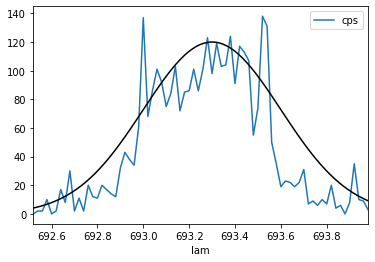

In [78]:
%matplotlib inline
lam = np.arange(692.5, 694, 0.01)
y_estimated = gaussian(lam, 693.3, 0.3, 120)
plt.figure()
mask = (fente_50["lam"] > 692.5) & (fente_50["lam"] < 694)
fente_50[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

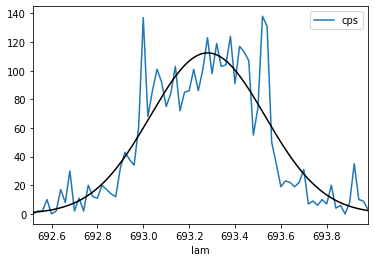

In [79]:
popt50, pcov50 = curve_fit(gaussian, 
                xdata=fente_50["lam"][mask],
                ydata=fente_50["cps"][mask],
                p0=[693.3, 0.3, 120])
fente_50[mask].plot(x="lam", y="cps")
plt.plot(lam,gaussian(lam, *popt50), "k-")

In [80]:
popt50

array([6.93280895e+02, 2.50905793e-01, 1.12392811e+02])

In [81]:
pcov50

array([[ 1.74326132e-04,  2.02459199e-07, -3.88187408e-05],
       [ 2.02459199e-07,  1.75248814e-04, -3.92243379e-02],
       [-3.88187408e-05, -3.92243379e-02,  2.62570047e+01]])

<Figure size 432x288 with 0 Axes>

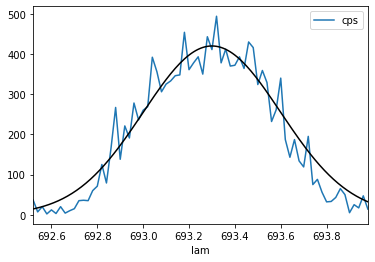

In [82]:
y_estimated = gaussian(lam, 693.3, 0.3, 420)
mask = (fente_200["lam"] > 692.5) & (fente_200["lam"] < 694)
plt.figure()
fente_200[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

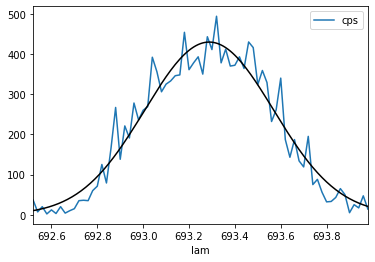

In [83]:
popt200, pcov200 = curve_fit(gaussian, 
                xdata=fente_200["lam"][mask],
                ydata=fente_200["cps"][mask],
                p0=[693.3, 0.3, 420])
fente_200[mask].plot(x="lam", y="cps")
plt.plot(lam, gaussian(lam, *popt200), "k-")

In [84]:
popt200

array([6.93288044e+02, 2.80802585e-01, 4.29751874e+02])

In [85]:
pcov200

array([[ 5.75350188e-05,  3.06108129e-07, -1.96270085e-04],
       [ 3.06108129e-07,  5.87629159e-05, -4.48102529e-02],
       [-1.96270085e-04, -4.48102529e-02,  1.01312948e+02]])

<Figure size 432x288 with 0 Axes>

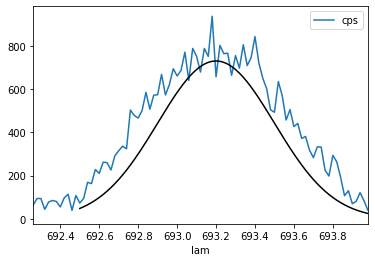

In [86]:
y_estimated = gaussian(lam, 693.2, 0.3, 730)
mask = (fente_500["lam"] > 692.25) & (fente_500["lam"] < 694)
plt.figure()
fente_500[mask].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

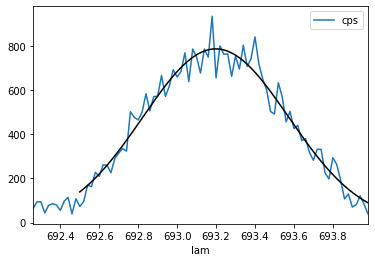

In [87]:
popt500, pcov500 = curve_fit(gaussian, 
                xdata=fente_500["lam"][mask],
                ydata=fente_500["cps"][mask],
                p0=[693.2, 0.3, 730])
fente_500[mask].plot(x="lam", y="cps")
plt.plot(lam, gaussian(lam, *popt500), "k-")

In [88]:
popt500

array([6.93198474e+02, 3.74804444e-01, 7.88709725e+02])

In [89]:
pcov500

array([[ 3.90709096e-05,  1.10846755e-06, -9.17105122e-04],
       [ 1.10846755e-06,  4.20033000e-05, -4.34744108e-02],
       [-9.17105122e-04, -4.34744108e-02,  1.30043582e+02]])

In [93]:
FWHM(popt500[1]) / 500 / 10**3

1.7651940367478223e-06

In [97]:
FWHM(popt200[1]) / 200 / 10**3

3.3061977838244103e-06

In [95]:
FWHM(popt50[1]) / 50 / 10**3

1.1816759805675467e-05

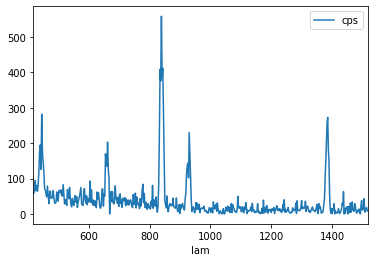

In [99]:
plasma.plot(x="lam", y="cps")

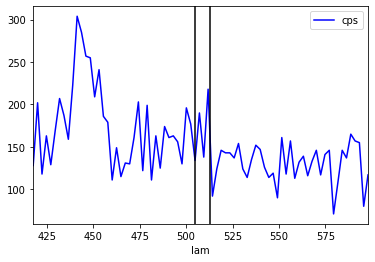

In [137]:
#red: 4H-SiC
#black: 6H-SiC
mask1 = (e1.lam < 600)
e1[mask1].plot(x="lam", y="cps", color="b")
#plt.axvline(610.5, color="r")
#plt.axvline(777, color="r")
#plt.axvline(797, color="r")
#plt.axvline(967, color="r")
#plt.axvline(966, color="k")
#plt.axvline(788, color="k")
#plt.axvline(767, color="k")
plt.axvline(505, color="k")
plt.axvline(513, color="k")

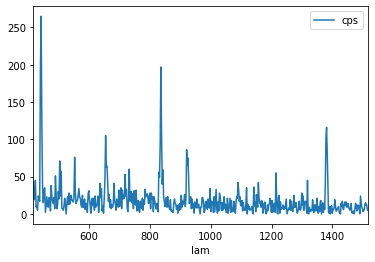

In [102]:
e2.plot(x="lam", y="cps")

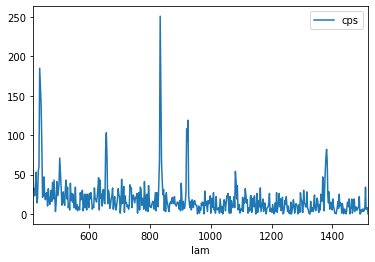

In [103]:
e3.plot(x="lam", y="cps")